In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

conn.commit()
conn.close()

In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

sales_data = [
    ("Product A", 10, 50),
    ("Product B", 5, 30),
    ("Product A", 7, 50),
    ("Product C", 3, 100),
    ("Product B", 10, 30)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()


In [3]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("sales_data.db")

query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0  Product A         68   3400.0
1  Product B         60   1800.0
2  Product C         12   1200.0


Sales Summary:

     product  total_qty  revenue
0  Product A         85   4250.0
1  Product B         75   2250.0
2  Product C         15   1500.0


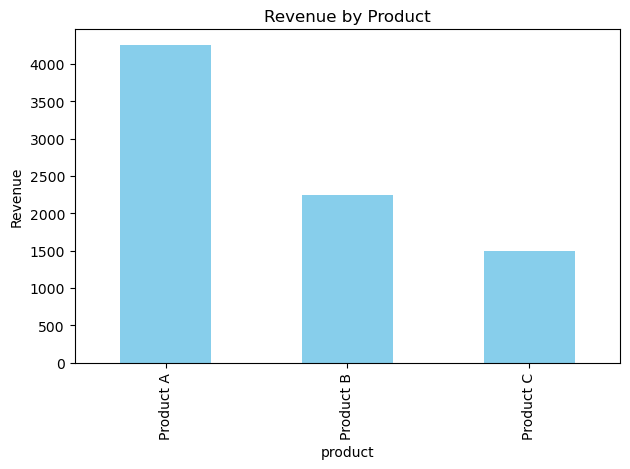

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

sales_data = [
    ("Product A", 10, 50),
    ("Product B", 5, 30),
    ("Product A", 7, 50),
    ("Product C", 3, 100),
    ("Product B", 10, 30)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:\n")
print(df)

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
